In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from modules import read_and_write
import subprocess

plt.style.use('grayscale')
%matplotlib widget
%load_ext autoreload
%autoreload 2
plt.ioff() 
plt.close('all')

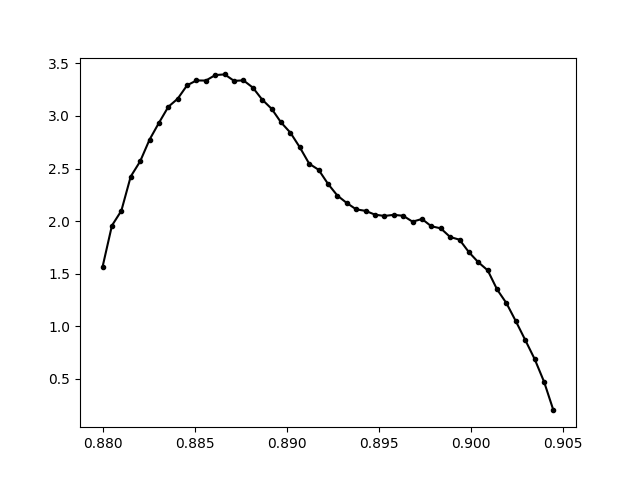

In [34]:

weight_file = '/home/haaaaron/SUN_twist_python_analysis/data/output-muca/44-44-64-6-output-twist-0/'
cold = '/home/haaaaron/HILA/applications/suN_gauge_twist/muca_10.787_44_44_64_6_0.905_0.880_100_1_0.0001/cold/'
hot = '/home/haaaaron/HILA/applications/suN_gauge_twist/muca_10.787_44_44_64_6_0.905_0.880_100_1_0.0001/hot/'

def plot_hist(file):
    data = pd.read_csv(file, sep='\t', header=0)
    plt.plot(data['OP_value'][:-2], data['Weight'][:-2],marker=".")
    plt.show()
plot_hist(weight_file + "example_weight_function_created_2025.02.05_03:07:14")
#plot_hist('/home/haaaaron/SUN_twist_python_analysis/intermediate_weight.dat')
#plot_hist(cold + "intermediate_weight.dat")
# plot_hist(hot + "intermediate_weight.dat")

In [3]:
weight_file = '/home/haaaaron/SUN_twist_python_analysis/data/output-muca/44-44-64-6-output-twist-0'
def plot_time_series_hist(file, label='plaquette:',dim=2,column=-1,term=1000,bound=None, delim=None, polyakov=False):
    OP_time_series = read_and_write.load_data_file_real(file, label, column=column, dim=dim, delim=delim, skip_lines=1)
    if bound:
        for i in range(len(OP_time_series[1])):
            if OP_time_series[1][i] < bound[0] or OP_time_series[1][i] > bound[1]:
                OP_time_series[1][i:i+bound[2]] = [np.nan] * min(bound[2], len(OP_time_series[1]) - i)
    data = OP_time_series[1]
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    
    axs[0].hist(data[term:], bins=50)
    axs[0].set_title('Histogram of Data')
    
    axs[1].plot(list(range(len(data[term:]))), data[term:], linestyle='-', linewidth=0.2)
    axs[1].set_title('Time Series Data')
    
    plt.tight_layout()
    plt.show()
    
    return OP_time_series


#OP_time_series = plot_time_series(cold + "out.txt")
#plot_time_series(hot + "out.txt")

In [5]:
OP_time_series = plot_time_series_hist(weight_file + "/out.txt",term=10, bound=(0.40,0.49,100))


FileNotFoundError: [Errno 2] No such file or directory: '/home/haaaaron/SUN_twist_python_analysis/data/output-muca/44-44-64-6-output-twist-0/out.txt'

Data array shape: (9998,)
First row of data: 0.898853307659
Data array shape: (9998,)
First row of data: 1.85230676231
('10.7873 0', array([0.89885331, 0.89572201, 0.90200676, ..., 0.89422215, 0.89888178,
       0.8995088 ])) ('10.7873 0', array([1.85230676, 2.05712765, 1.19474335, ..., 2.09870666, 1.84818353,
       1.79439185]))


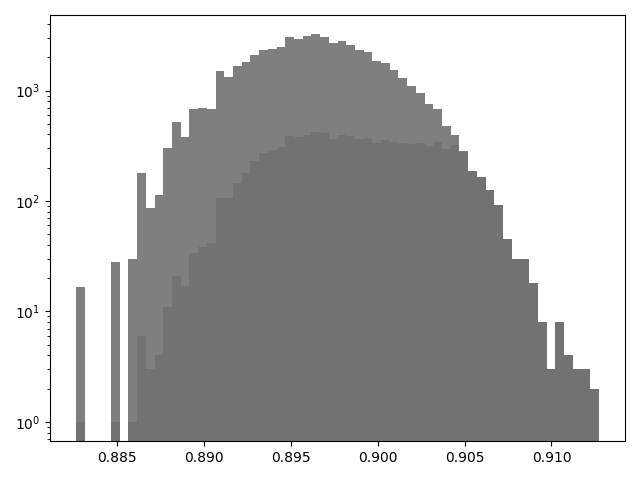

In [33]:
def plot_weighted(file,term=1000):
    
    polyakov_abs = read_and_write.load_data_file_real(file, 'polyakov abs:', column=-1, dim=1, delim="", skip_lines=0)
    weights = read_and_write.load_data_file_real(file, 'muca_polyakov:', dim=1, delim="",skip_lines=0)
    print(polyakov_abs,weights)
    #plt.plot(plaquette[1][term:])), plaquette[1][term:], linestyle='-', linewidth=0.2)
    plt.hist(polyakov_abs[1][term:], bins=60, weights=np.exp(weights[1][term:]),alpha=0.5)
    plt.hist(polyakov_abs[1][term:], bins=60,alpha=0.5)
    plt.yscale('log')
    
    plt.tight_layout()
    plt.show()
    return polyakov_abs,weights
    
x,y = plot_weighted(weight_file + "/out-10.7873.txt", term=0)

Data array shape: (586,)
First row of data: 0.549612345788
('24.941 0', array([0.54961235, 0.54531373, 0.54103009, 0.53687051, 0.53271069,
       0.52841388, 0.52415026, 0.5197976 , 0.51522021, 0.51064662,
       0.50617306, 0.50153595, 0.49682789, 0.49212255, 0.48766931,
       0.48342678, 0.4793523 , 0.47552543, 0.4721349 , 0.4689338 ,
       0.46613929, 0.46376223, 0.4617737 , 0.45988069, 0.45840311,
       0.4571183 , 0.45594595, 0.45487737, 0.45419774, 0.45351043,
       0.45294804, 0.45248738, 0.45218873, 0.451843  , 0.4515354 ,
       0.45121106, 0.45091169, 0.45075998, 0.4506359 , 0.45045314,
       0.45044656, 0.45010612, 0.44998089, 0.45007096, 0.44988077,
       0.44976125, 0.44962476, 0.44954266, 0.44939743, 0.44944998,
       0.44929634, 0.44928315, 0.44929401, 0.44917248, 0.44909032,
       0.44897616, 0.44896535, 0.44890378, 0.44883804, 0.4488561 ,
       0.44900957, 0.44897282, 0.44886263, 0.44883242, 0.44882302,
       0.44889347, 0.44887549, 0.44861175, 0.44862077, 0.

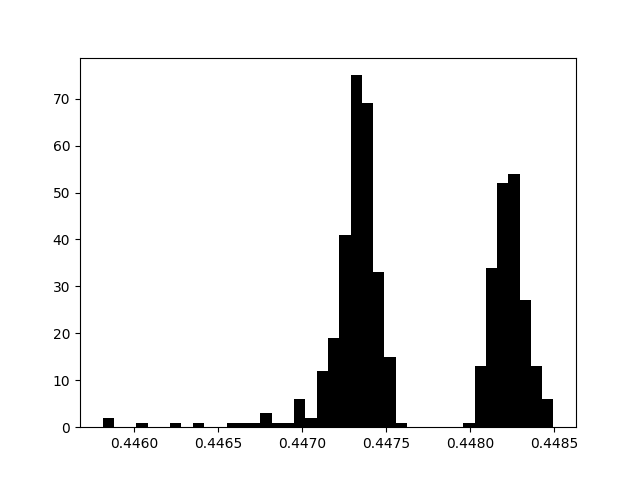

In [10]:
plaquette = read_and_write.load_data_file_real(weight_file + 'out.txt', 'plaquette:', column=-1, dim=2, delim="", skip_lines=3)
print(plaquette)
#plt.plot(list(range(len(plaquette[1][100:]))),plaquette[1][100:], linestyle='-', linewidth=0.2)
plt.hist(plaquette[1][100:],bins=40)
plt.show()

In [3]:
import subprocess

remote_path = 'lumi.csc.fi:/projappl/project_462000781/HILA/applications/'
local_path = '/home/haaaaron/SUN_twist_python_analysis/remote_muca/'

folders = [
    'muca_64_64_64_6/out.txt',
    'muca_60_60_64_6/out.txt',
    'muca_56_56_64_6/out.txt',
    'muca_52_52_64_6/out.txt',
    'muca_48_48_64_6/out.txt',
    'muca_44_44_64_6/out.txt'
]

for folder in folders:
    subprocess.run(['rsync', '-avz', remote_path + folder, local_path + folder.split('/')[0]])

receiving incremental file list
out.txt

sent 3.595 bytes  received 15.708 bytes  7.721,20 bytes/sec
total size is 494.249  speedup is 25,60
receiving incremental file list
out.txt

sent 3.715 bytes  received 16.523 bytes  8.095,20 bytes/sec
total size is 509.562  speedup is 25,18
receiving incremental file list
out.txt

sent 3.835 bytes  received 16.943 bytes  13.852,00 bytes/sec
total size is 526.319  speedup is 25,33
receiving incremental file list
out.txt

sent 4.135 bytes  received 18.676 bytes  15.207,33 bytes/sec
total size is 569.495  speedup is 24,97
receiving incremental file list
out.txt

sent 4.285 bytes  received 18.741 bytes  15.350,67 bytes/sec
total size is 592.306  speedup is 25,72
receiving incremental file list
out.txt

sent 4.381 bytes  received 19.492 bytes  15.915,33 bytes/sec
total size is 617.741  speedup is 25,88


In [4]:
def plot_polyakov_muca(file, label='polyakov:', dim=2, column=-1, term=1000, bound=None, delim=None):
    OP_time_series = read_and_write.load_data_file_complex(file, label, column=column, dim=dim, delim=delim, skip_lines=1)
    data = OP_time_series[1][term:]
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create a colormap
    cmap = plt.get_cmap('viridis')
    colors = np.linspace(0, 1, len(data))
    
    # Plot with color gradient
    scatter = ax.scatter(data.real, data.imag, c=colors, cmap=cmap, s=2)
    
    ax.set_title('Scatter Plot of Complex Data with Color Gradient')
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    
    max_val = max(abs(data.real).max(), abs(data.imag).max())
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Time Step')
    
    plt.tight_layout()
    plt.show()


muca_64_64_64_6
Data array shape: (8195,)
First row of data: 0.684515


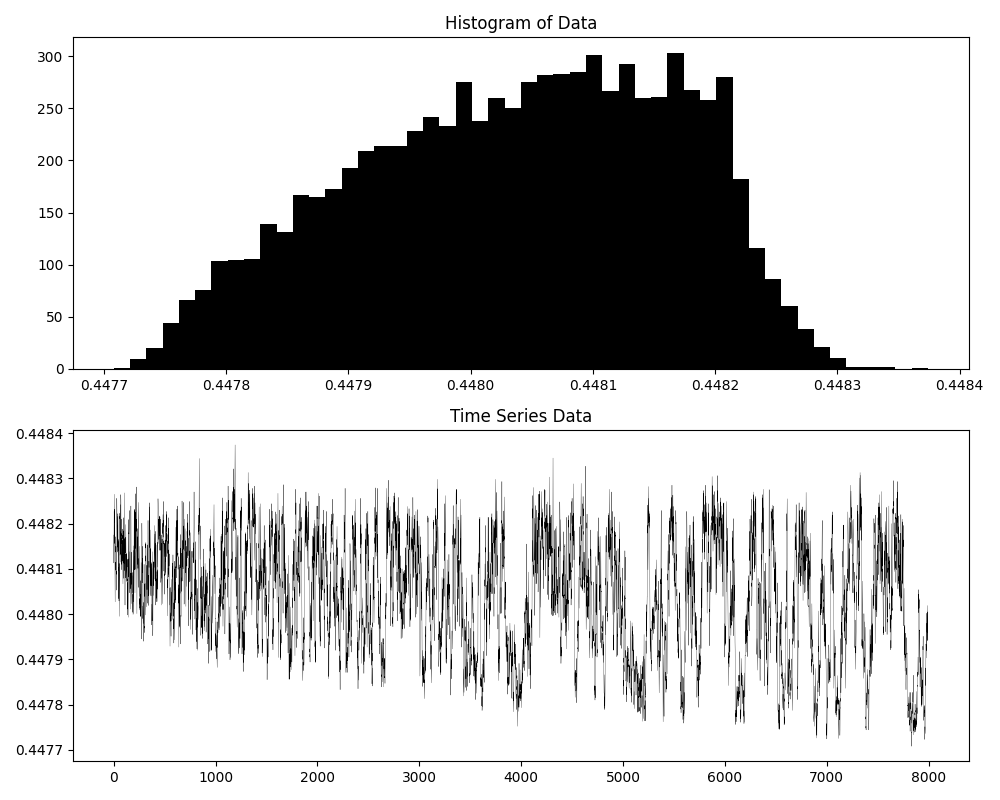

Data array shape: (8195,)
First row of data: (0.00141933+0.0014678j)


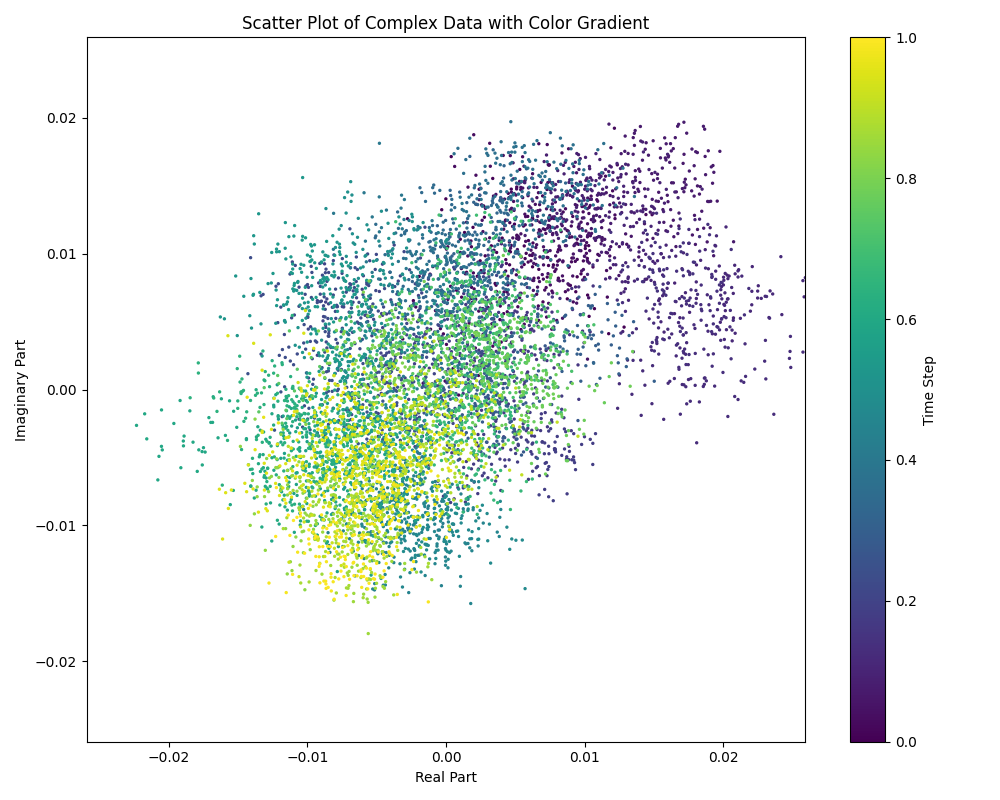

muca_60_60_64_6
Data array shape: (8430,)
First row of data: 0.684541


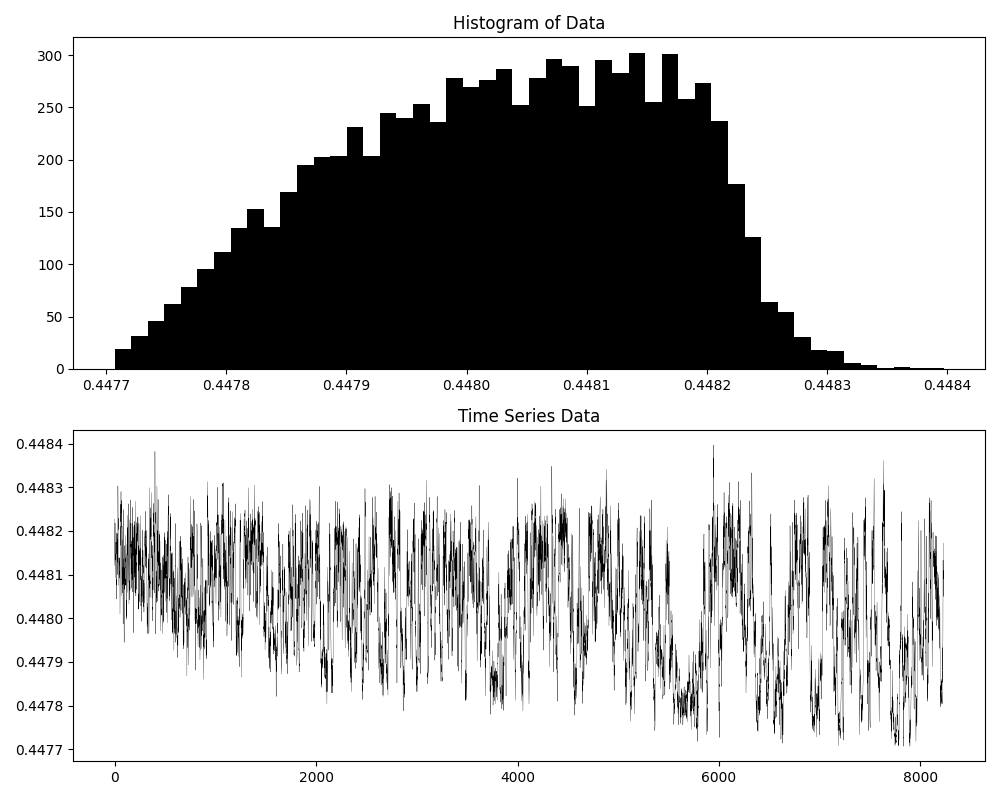

Data array shape: (8430,)
First row of data: (0.00255142-0.00181809j)


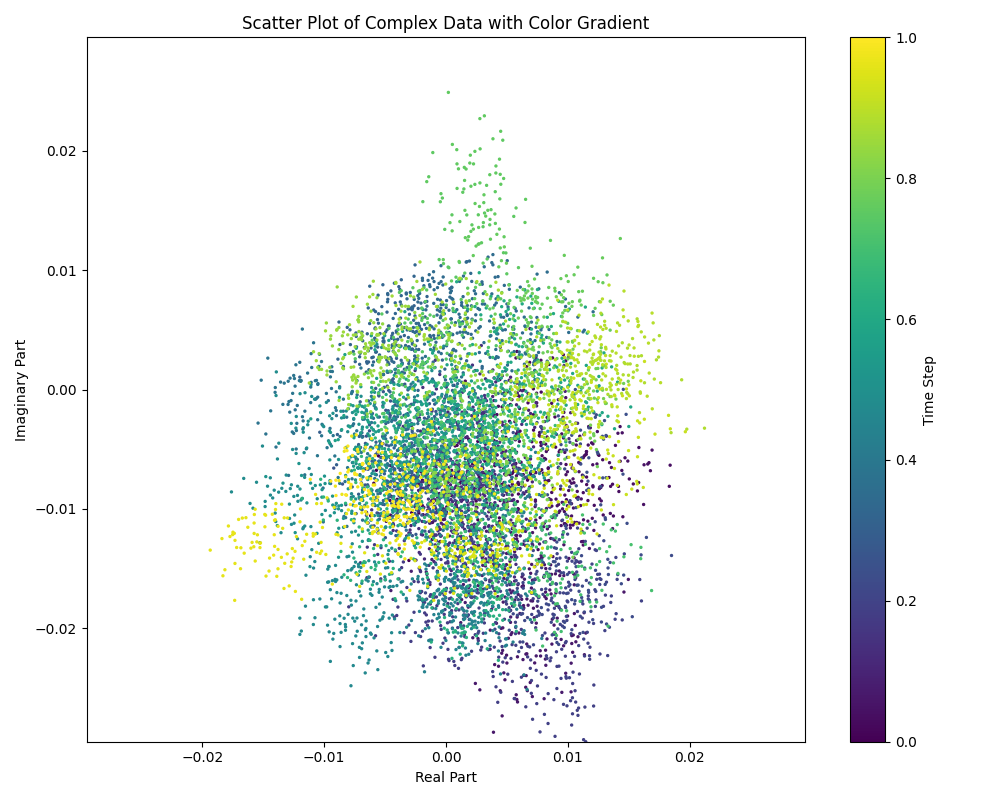

muca_56_56_64_6
Data array shape: (8834,)
First row of data: 0.684581


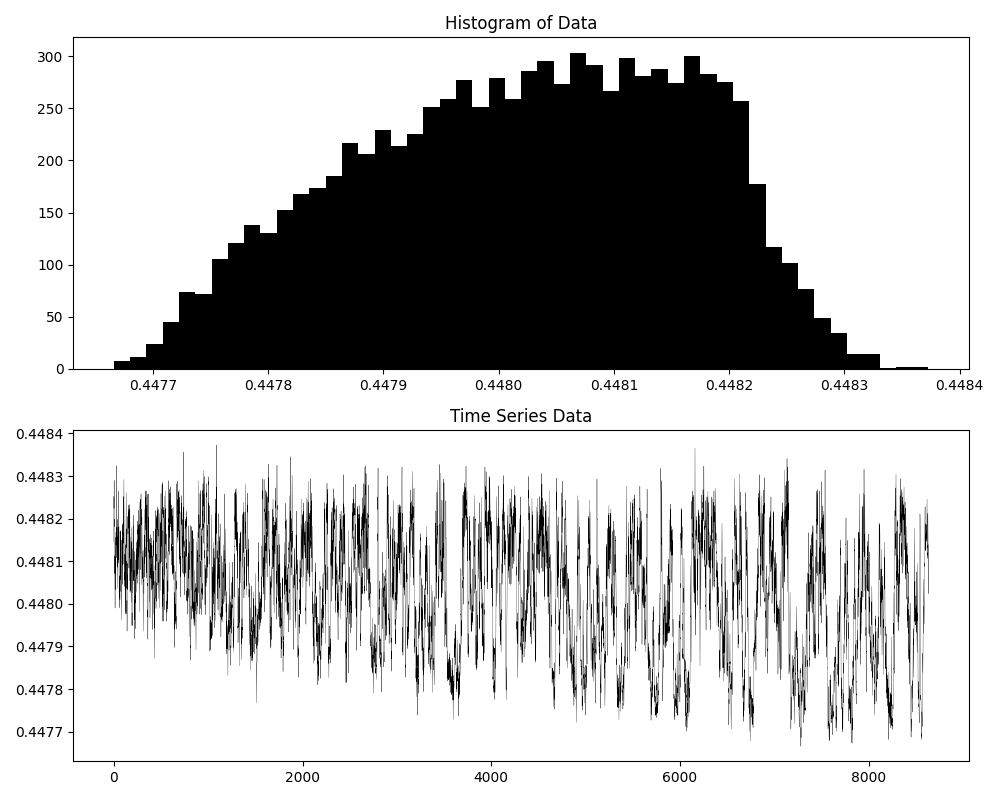

Data array shape: (8834,)
First row of data: (-0.00255527-0.000762734j)


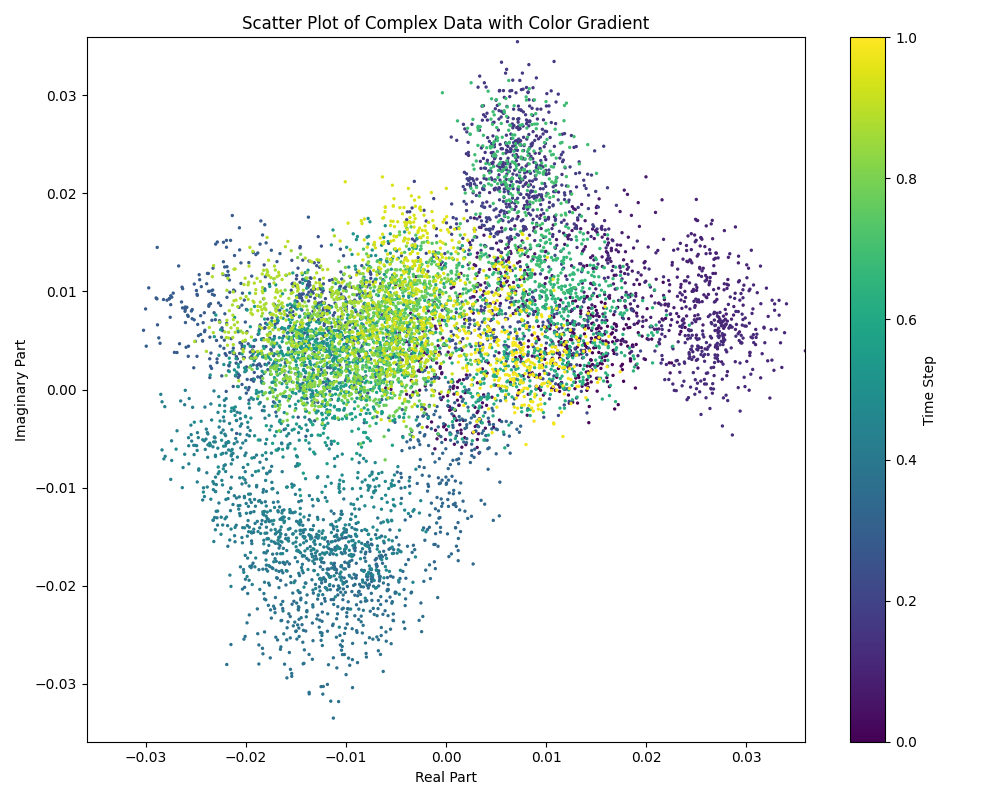

muca_52_52_64_6
Data array shape: (9509,)
First row of data: 0.684611


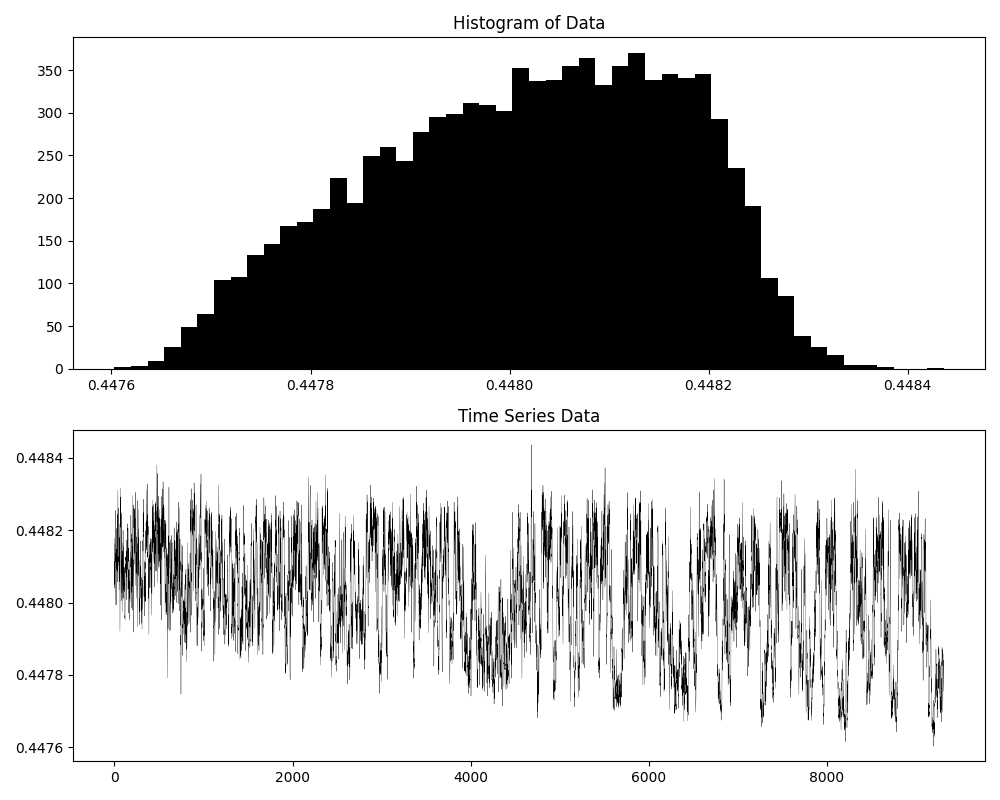

Data array shape: (9509,)
First row of data: (0.00266088-0.000868952j)


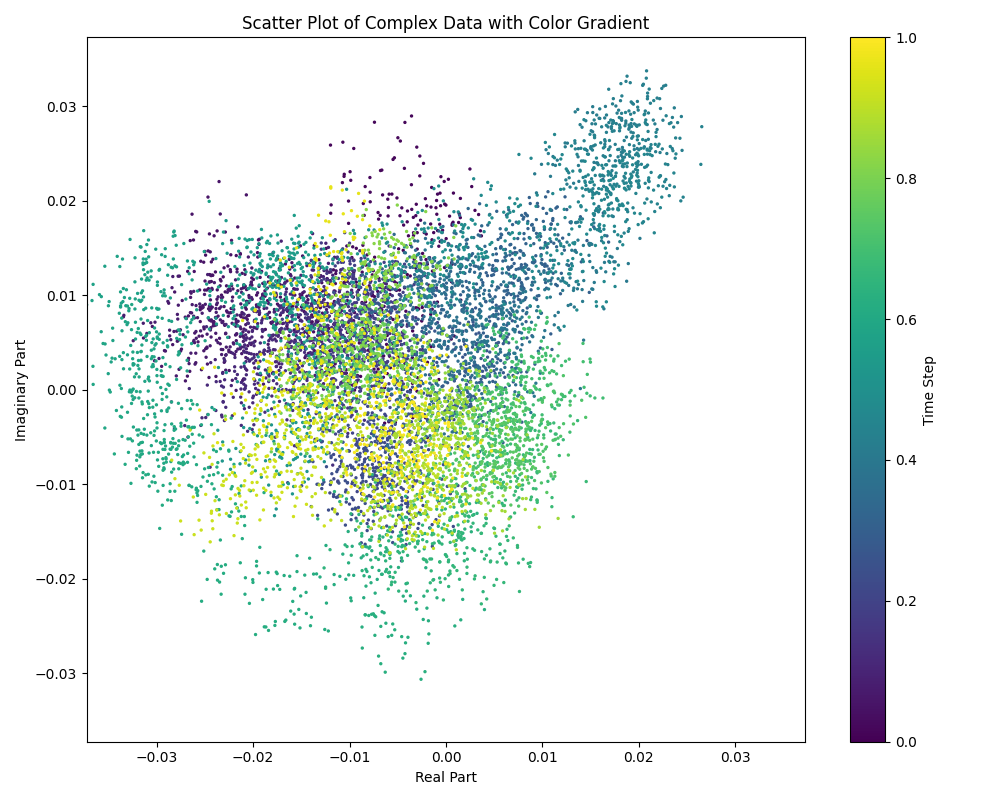

muca_48_48_64_6
Data array shape: (9860,)
First row of data: 0.684474


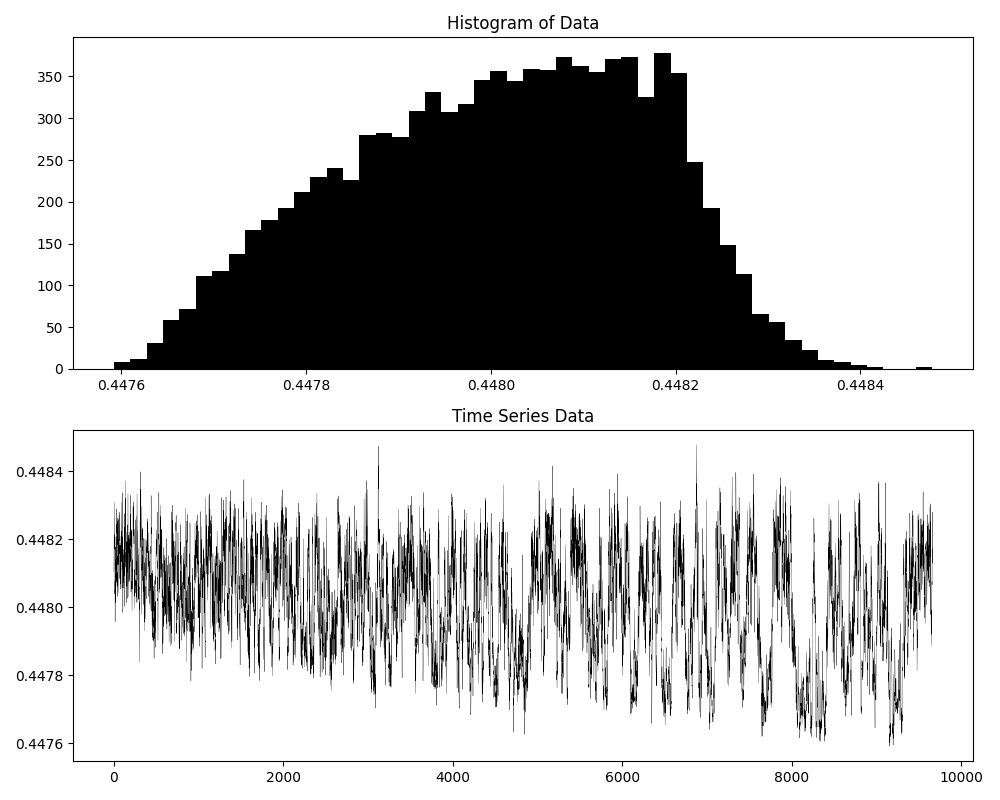

Data array shape: (9860,)
First row of data: (0.000714019+1.52958e-05j)


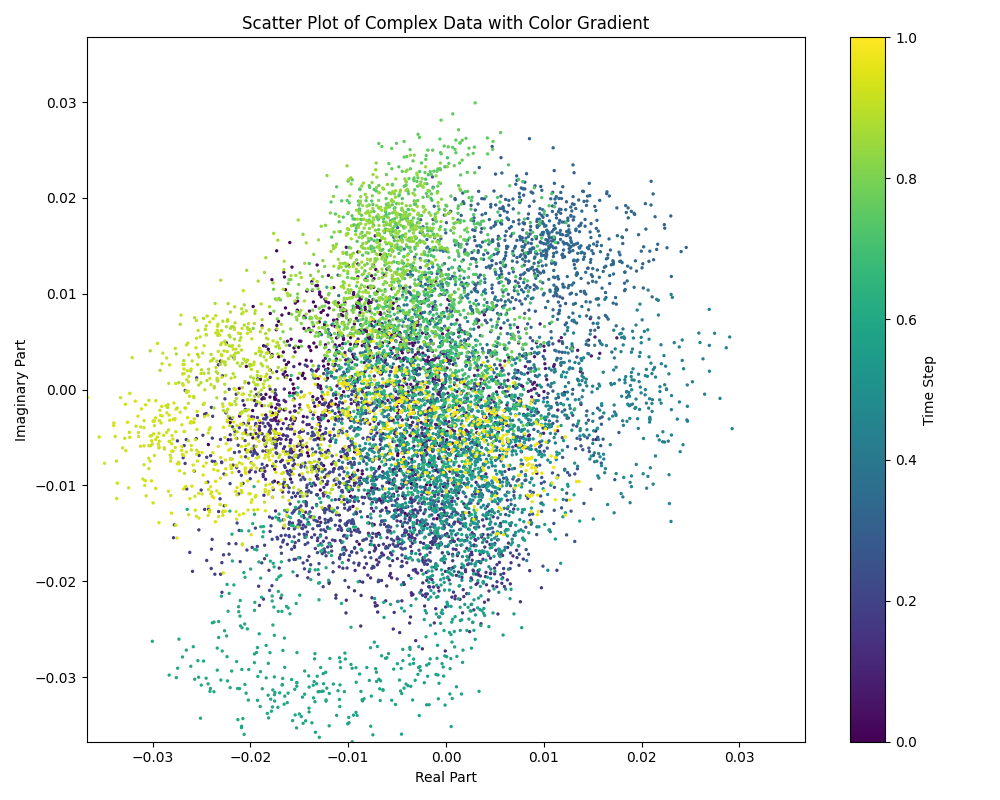

muca_44_44_64_6
Data array shape: (10324,)
First row of data: 0.684619


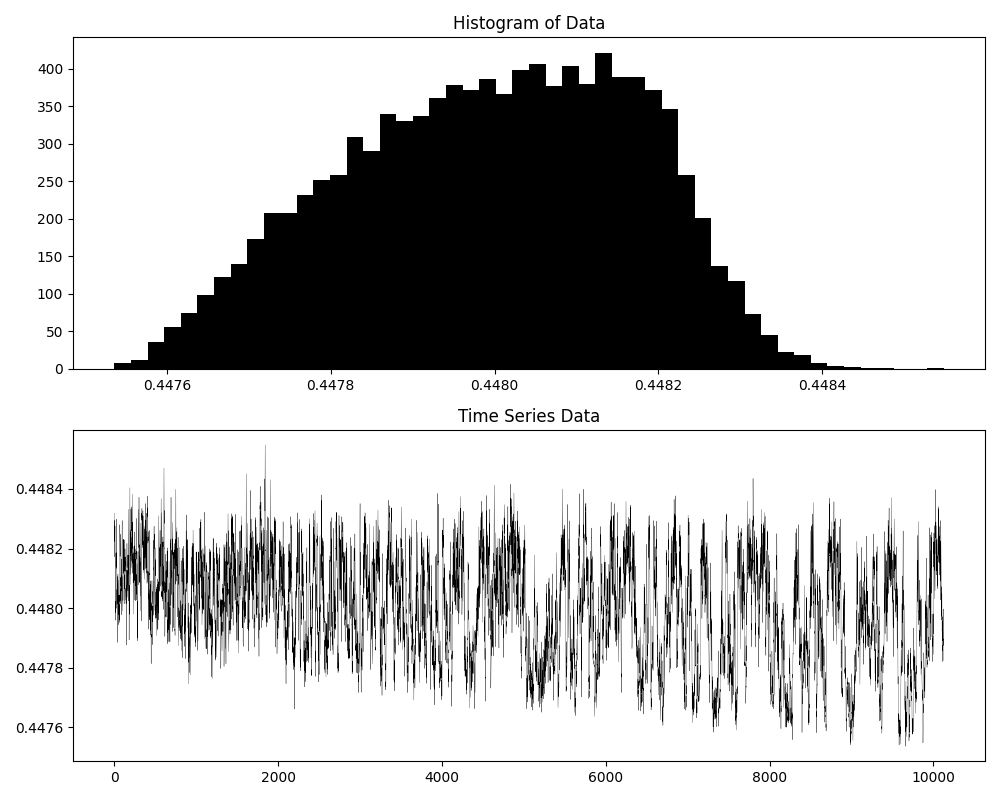

Data array shape: (10324,)
First row of data: (-0.000255859+0.00148949j)


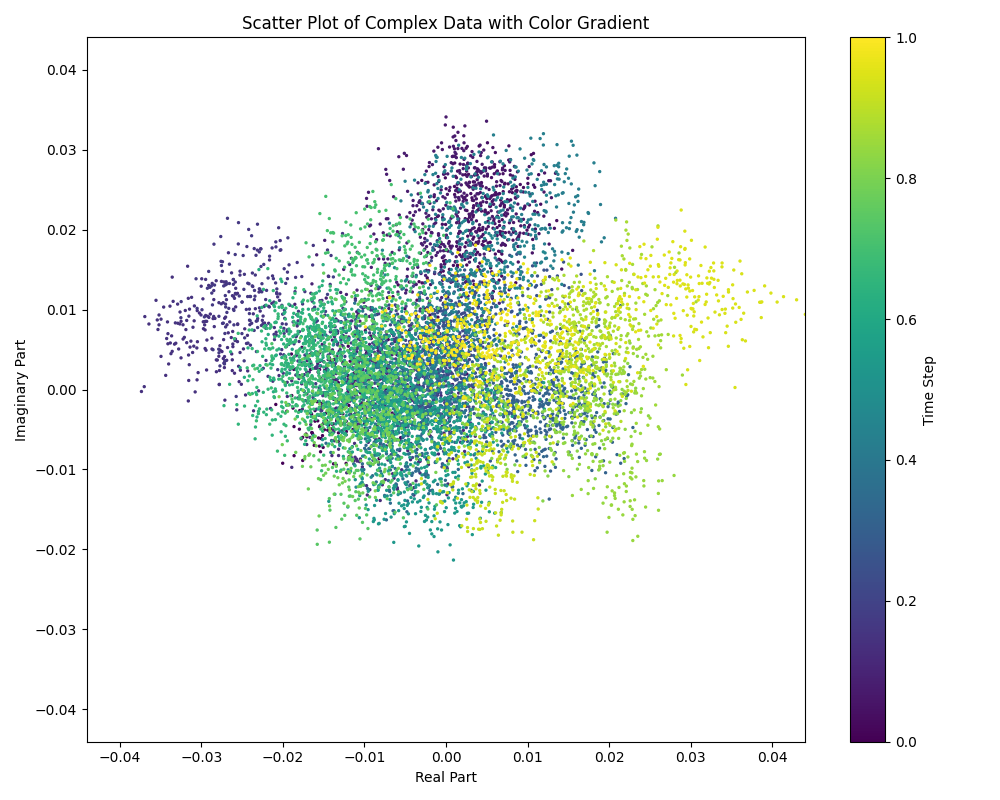

In [5]:
for folder in folders:
    print(folder.split('/')[0])
    OP_time_series = plot_time_series_hist(local_path + folder.split('/')[0],term=200,label="Order parameter:",dim=1)
    OP_time_series = plot_polyakov_muca(local_path + folder.split('/')[0],term=200,label="polyakov:",dim=1)
